In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"C:\Users\jmadh\Downloads\archive (1)\heart.csv")   # Use your dataset file
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

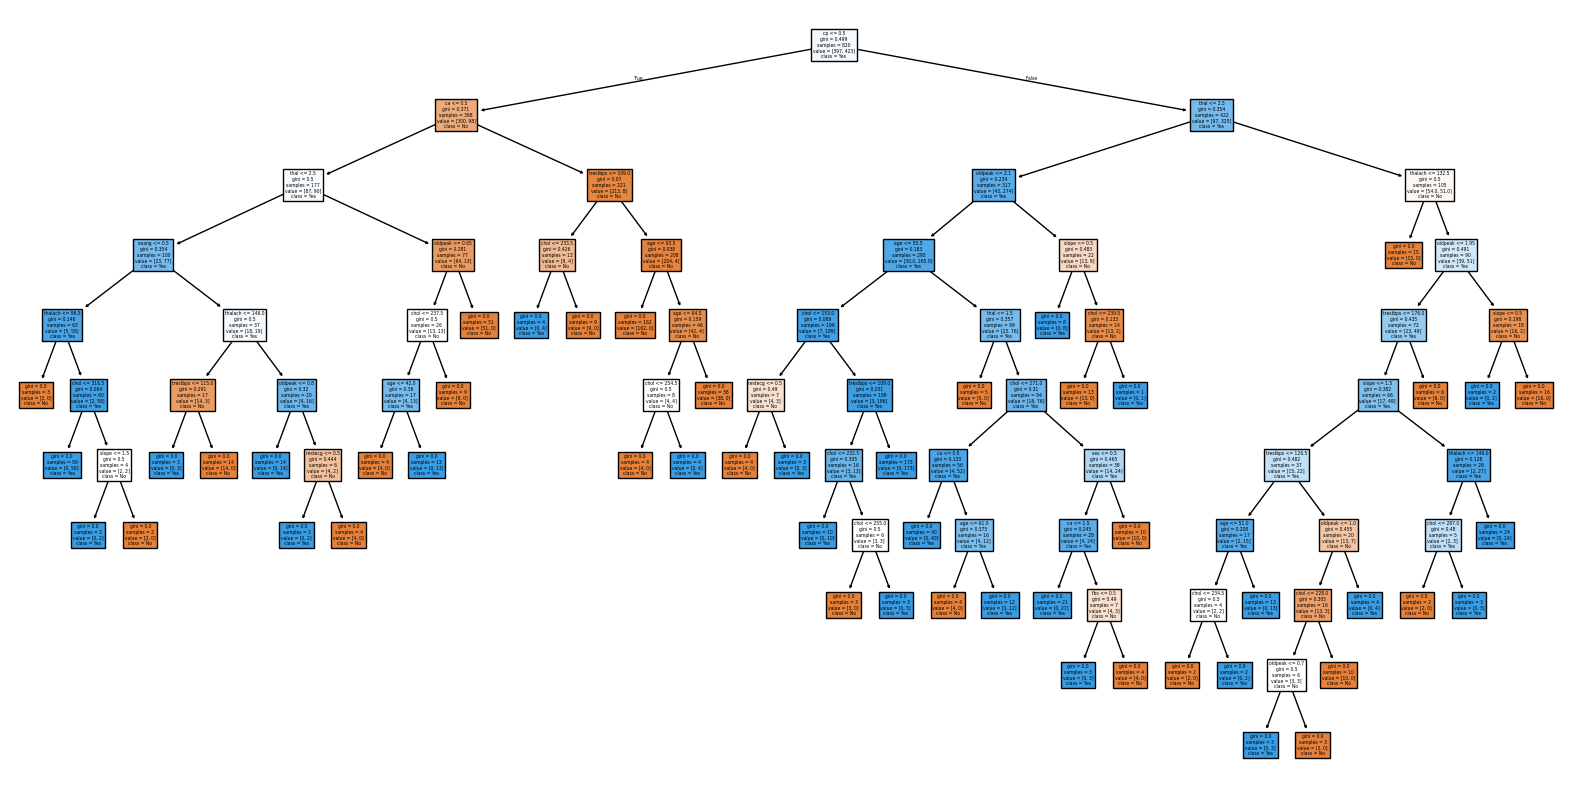

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.show()


In [14]:
dt2 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt2.fit(X_train, y_train)

print("Train accuracy:", dt2.score(X_train, y_train))
print("Test accuracy:", dt2.score(X_test, y_test))


Train accuracy: 0.8829268292682927
Test accuracy: 0.8


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Test Accuracy:", rf.score(X_test, y_test))


Random Forest Test Accuracy: 0.9853658536585366


In [16]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)


cp          0.136494
ca          0.123180
thal        0.122048
thalach     0.119684
oldpeak     0.117045
age         0.079199
chol        0.078098
trestbps    0.069589
exang       0.055335
slope       0.043412
sex         0.028806
restecg     0.018946
fbs         0.008162
dtype: float64

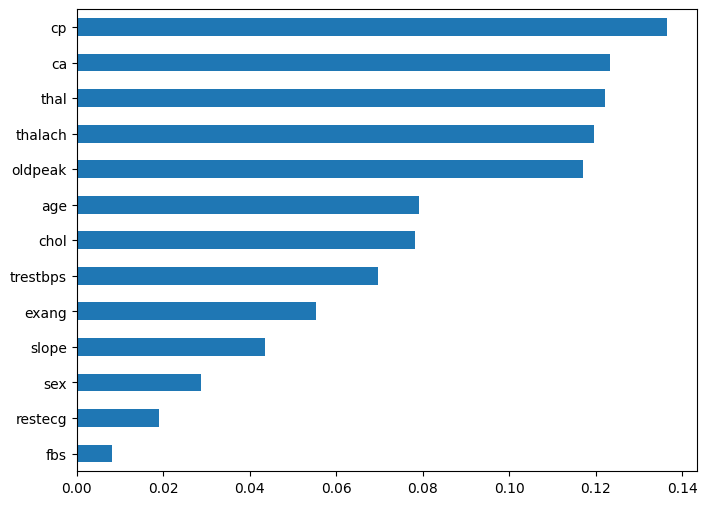

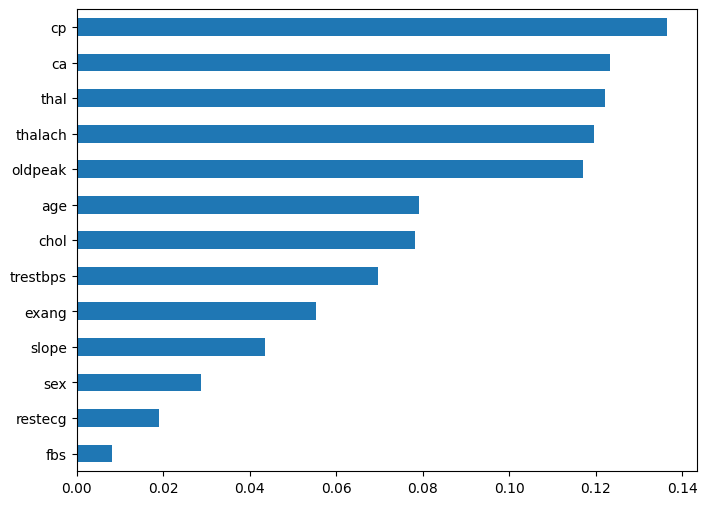

In [17]:
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.show()
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.show()


In [18]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print("CV Accuracy:", cv_scores.mean())


CV Accuracy: 0.9970731707317073
